In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

(152, 1530)


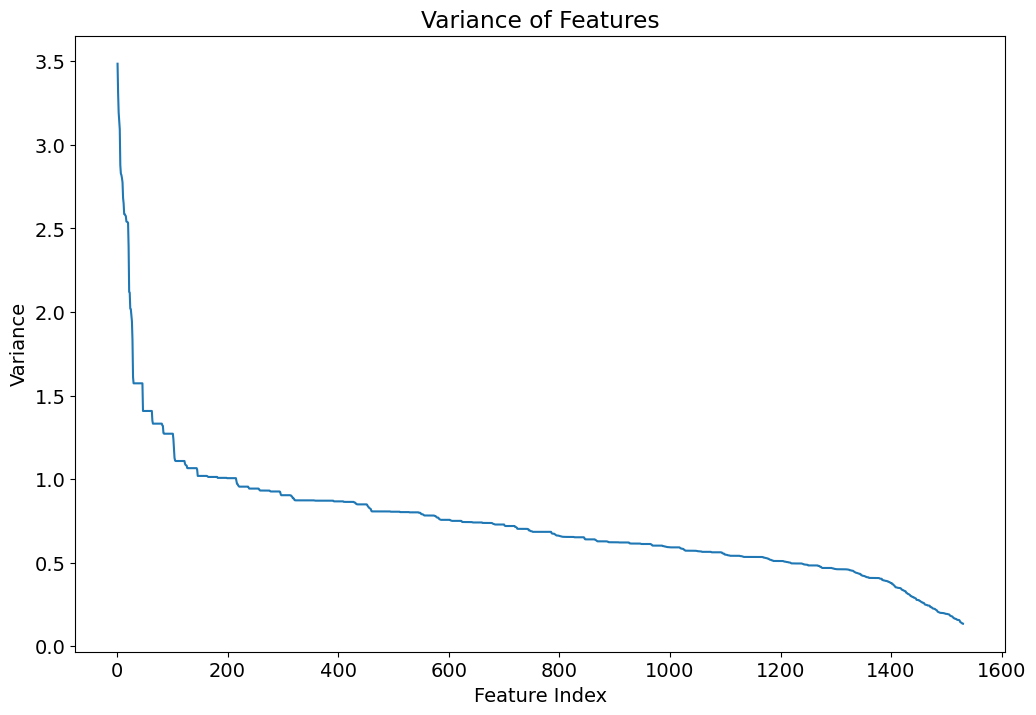

In [57]:
variances = np.var(data, axis=0)

sorted_variances = np.sort(variances)[::-1]
x = np.arange(1, len(sorted_variances) + 1)

plt.plot(x, sorted_variances)
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Variance of Features')
plt.show()

In [58]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info = data_info.loc[:120]
data_filt = data_info.dropna()

labels = data_filt.values[:,1]
aug_labels = np.array(labels) + np.random.normal(0, 1, len(labels))
aug_labels
y = aug_labels

dfX = pd.DataFrame(data)
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
dfXExisting = dfX.loc[existing_indices]
X = dfXExisting.values

X.shape,y.shape

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


((118, 1530), (118,))

In [59]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (94, 1530)
Testing set size: (24, 1530)


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [61]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
rf.feature_importances_

array([1.36982522e-03, 1.56179006e-05, 9.16054639e-07, ...,
       2.26937521e-05, 2.59878811e-04, 8.16906255e-07])

<BarContainer object of 1530 artists>

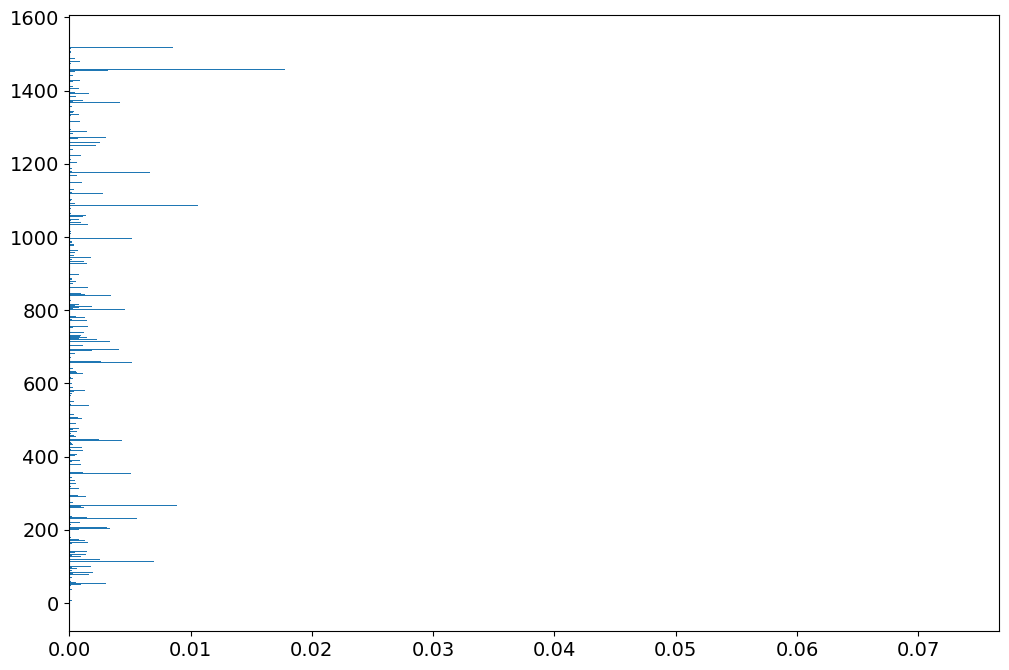

In [63]:
plt.barh(range(X_train.shape[1]), rf.feature_importances_)

Overall measures: 
Correlation: 0.8596480305961568
MAE:  4.998096055838127
R2:  0.6629170096308326


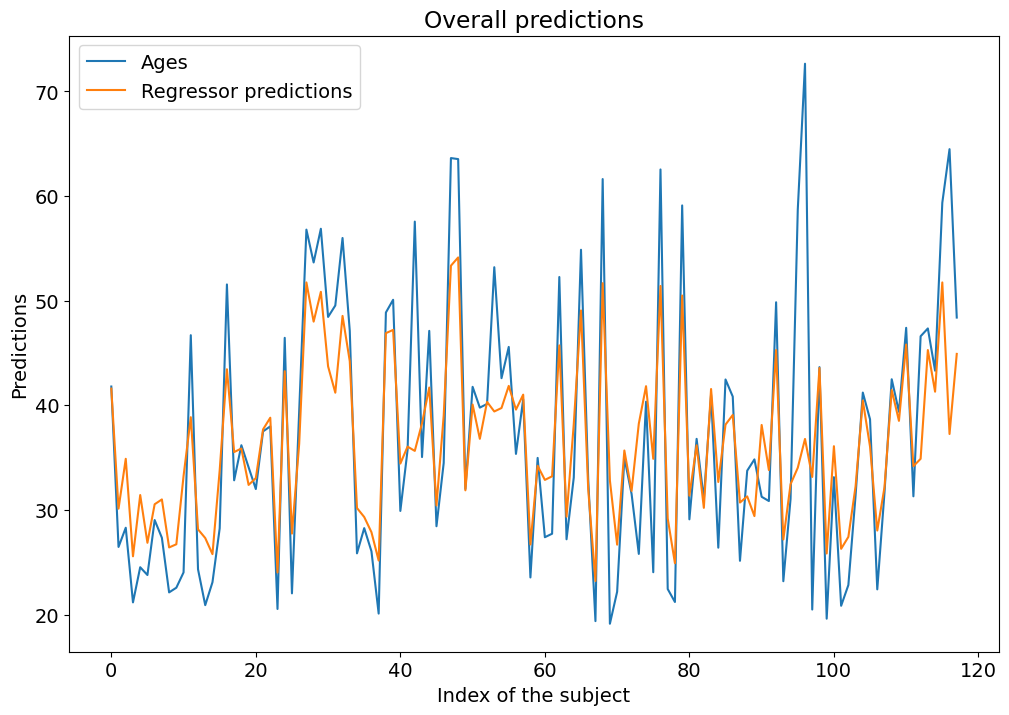

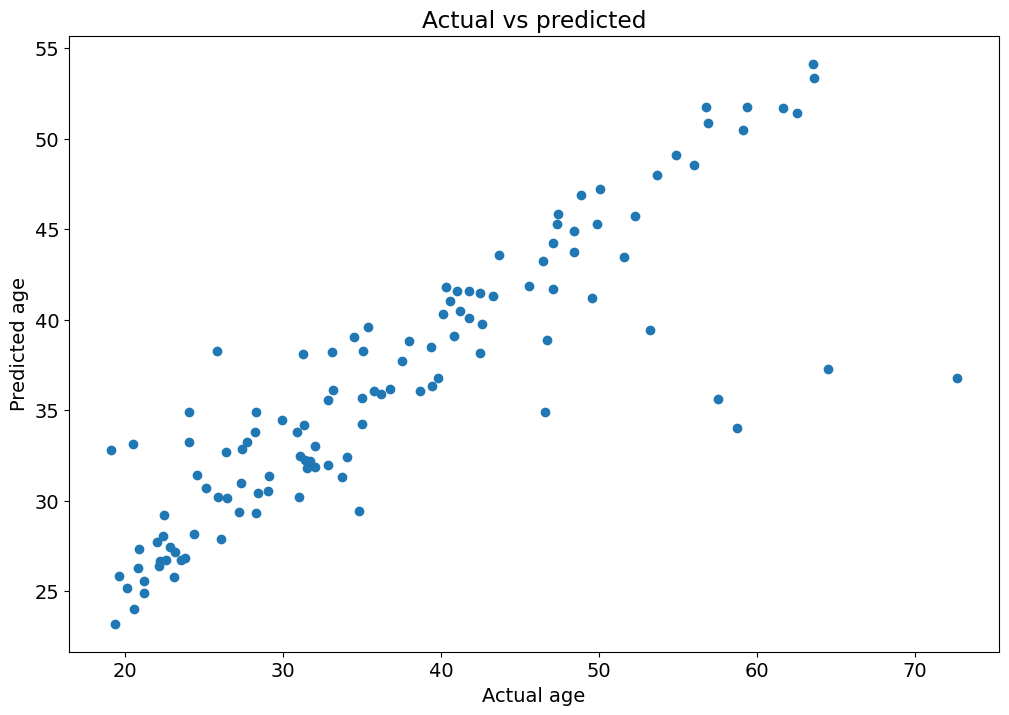

In [64]:
from scipy.stats import pearsonr

pred = rf.predict(X)

print("Overall measures: ")
corr,_ = pearsonr(pred,y)
print(f"Correlation: {corr}")

mae = sum(abs(rf.predict(X) - y))/len(y)
print("MAE: ",mae)

r2 = rf.score(X, y)
print("R2: ",r2)

x = range(len(y))

plt.plot(x, y, label='Ages')
plt.plot(x, pred, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(y, pred)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

Train measures: 
Correlation: 0.9729291709180693
MAE:  3.8002925779599046
R2:  0.8521153629560242


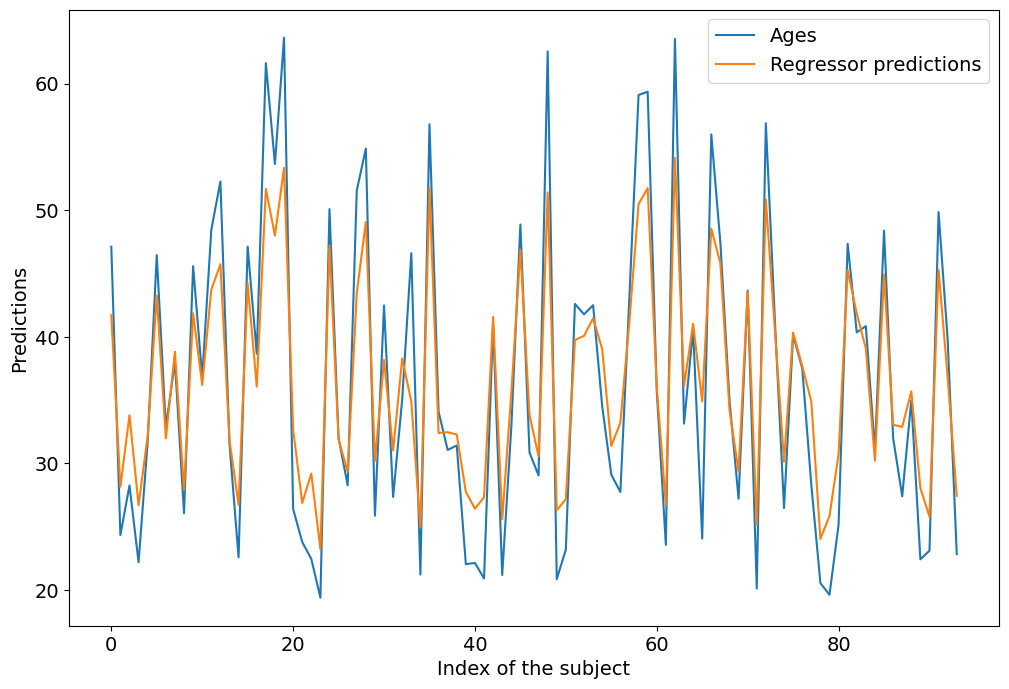

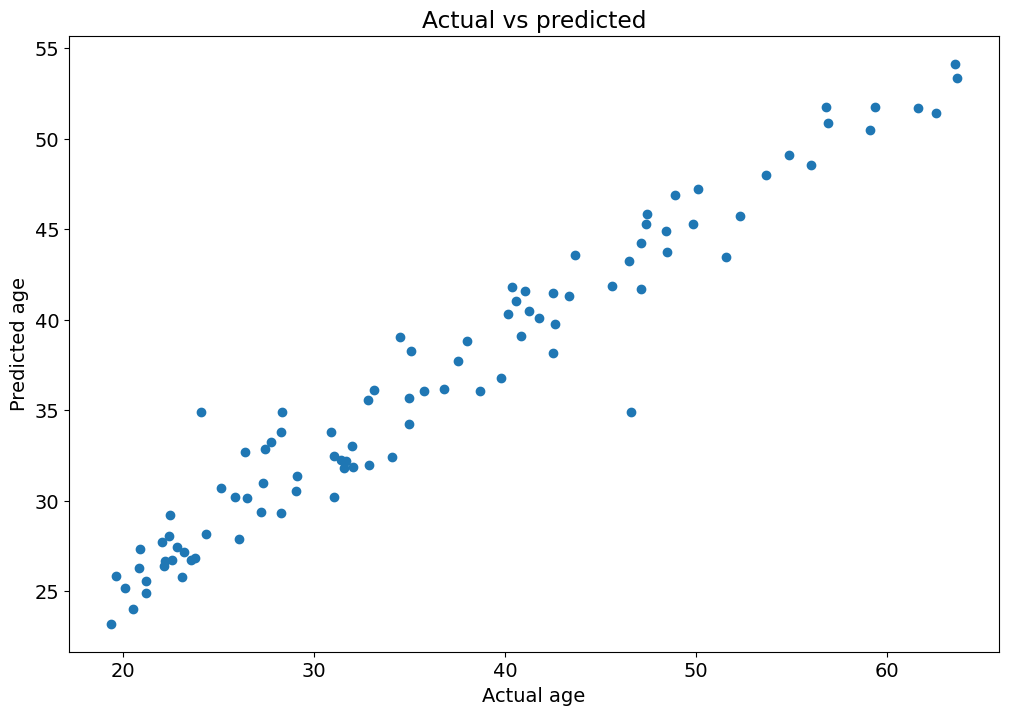

In [65]:
print("Train measures: ")
pred_tr = rf.predict(X_train)

corr_tr,_ = pearsonr(pred_tr,y_train)
print(f"Correlation: {corr_tr}")

mae_tr = sum(abs(pred_tr - y_train))/len(y_train)
print("MAE: ",mae_tr)

r2_tr = rf.score(X_train, y_train)
print("R2: ",r2_tr)

x_tr = range(len(y_train))

plt.plot(x_tr, y_train, label='Ages')
plt.plot(x_tr, pred_tr, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(y_train, pred_tr)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

Test measures: 
Correlation: 0.3997393160399311
MAE:  9.689493010861158
R2:  0.08833009035767203


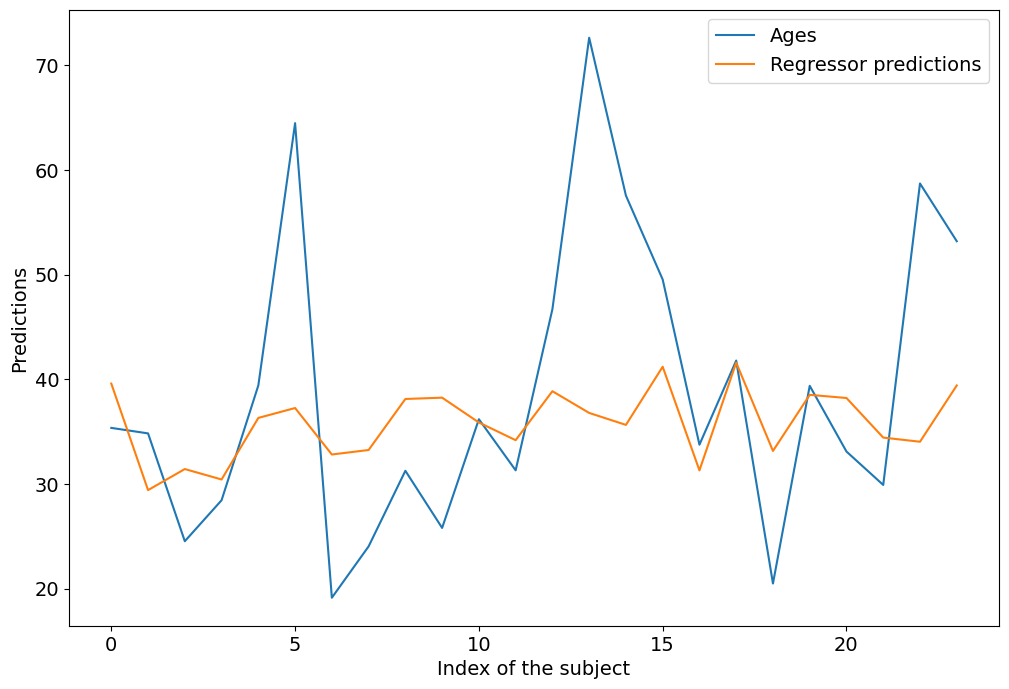

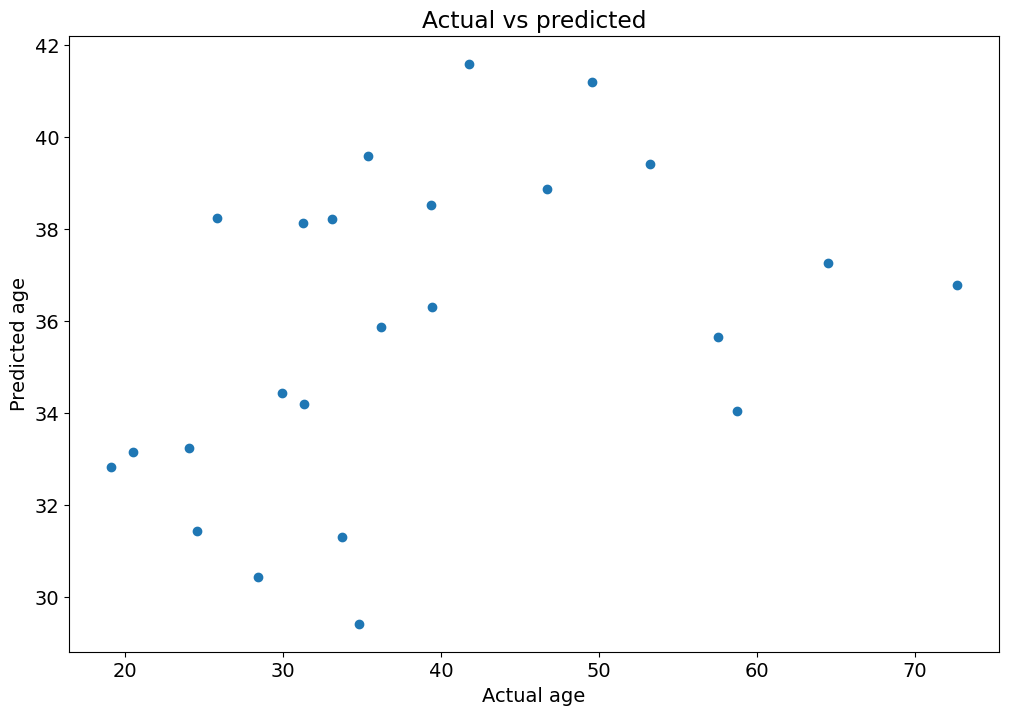

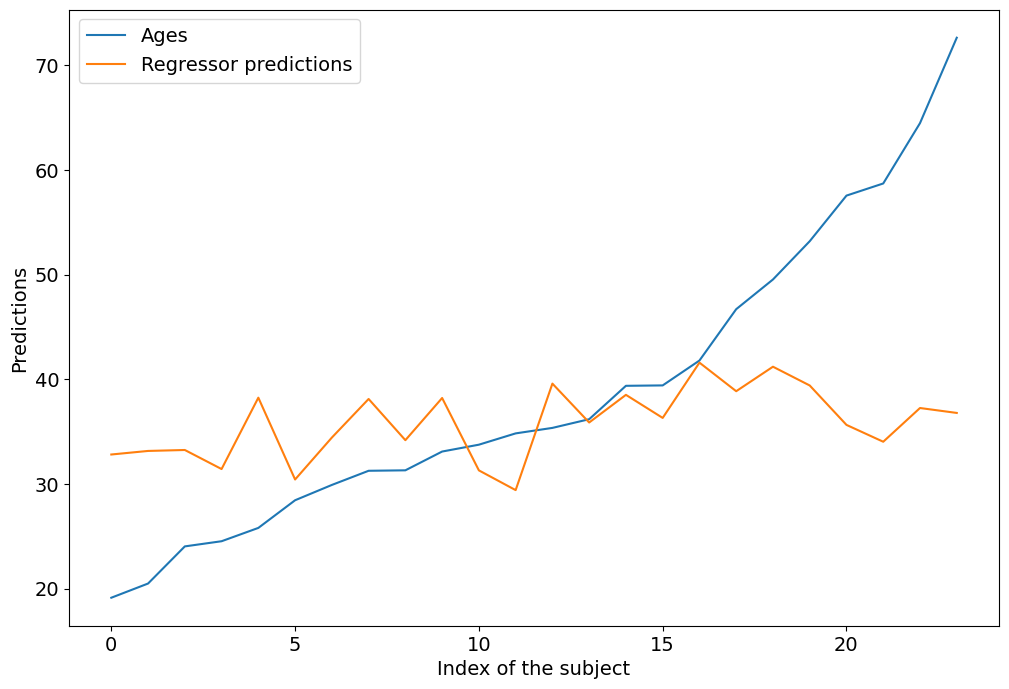

In [67]:
print("Test measures: ")
pred_t = rf.predict(X_test)

corr_t,_ = pearsonr(pred_t,y_test)
print(f"Correlation: {corr_t}")

mae_t = sum(abs(pred_t - y_test))/len(y_test)
print("MAE: ",mae_t)

r2_t = rf.score(X_test, y_test)
print("R2: ",r2_t)

x_t = range(len(y_test))

plt.plot(x_t, y_test, label='Ages')
plt.plot(x_t, pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(y_test, pred_t)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

# Sorted data

sorted_data = sorted(zip(y_test, pred_t))
sorted_y_test, sorted_pred_t = zip(*sorted_data)

plt.plot(x_t, sorted_y_test, label='Ages')
plt.plot(x_t, sorted_pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# There is clear overfitting!